In [4]:
import numpy as np
from scipy import misc
import cv2
import matplotlib.pyplot as plt

In [45]:
# img = cv2.imread("../images/phantom.png",0)
img = np.ones((480,480), dtype='uint8')*255
img.shape

(480, 480)

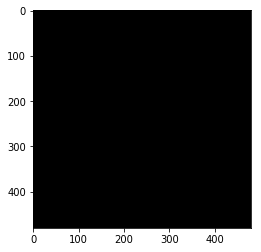

In [46]:
% matplotlib inline
plt.imshow(img, cmap="gray")

In [47]:
steps = 480
sinogram = np.zeros((steps, steps), dtype=np.float64)

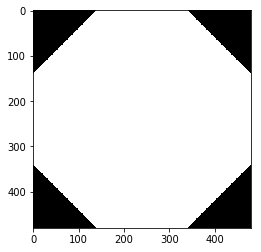

In [48]:
temp = misc.imrotate(img, -45).astype('float64')
plt.imshow(temp, cmap ='gray')

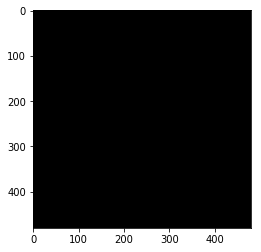

In [49]:
for step in range(steps):
    rotation = misc.imrotate(img, -step*180/steps).astype('float64')
    if(step/12 == 0):
        plt.imshow(rotation, cmap='gray')
    sinogram[:,step] = sum(rotation)

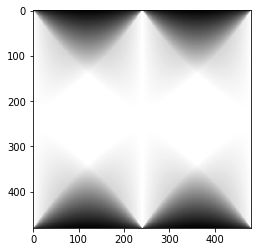

In [50]:
% matplotlib inline
plt.imshow(sinogram, cmap="gray")

In [15]:
diagonal = int(np.ceil(np.sqrt(2) * sinogram.shape[0]))
diagonal

679

In [16]:
pad = diagonal - sinogram.shape[0]
pad

199

In [17]:
old_center = sinogram.shape[0] // 2
old_center

240

In [18]:
new_center = diagonal // 2
new_center

339

In [19]:
pad_before = new_center - old_center
pad_before

99

In [27]:
pad_width = ((pad_before, pad - pad_before), (0, 0))
pad_width

((99, 100), (0, 0))

In [30]:
radon_image = np.pad(sinogram, pad_width, mode='constant', constant_values=0)
radon_imagth = (np.pi / 180.0) * thetae.shape

(679, 480)

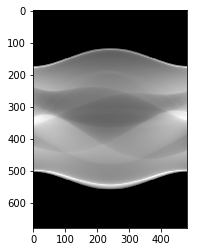

In [31]:
plt.imshow(radon_image,cmap = 'gray')

In [51]:
theta = np.linspace(0., 180., max(img.shape), endpoint=False) #0 to 180
theta.shape

(480,)

In [54]:
th = (np.pi / 180.0) * theta #0 to 3.14
th.shape

(480,)

In [39]:
projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * radon_image.shape[0]))))
projection_size_padded

2048

In [41]:
pad_width = ((0, projection_size_padded - radon_image.shape[0]), (0, 0))
pad_width

((0, 1369), (0, 0))

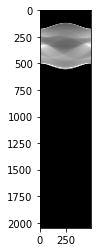

In [45]:
img = np.pad(radon_image, pad_width, mode='constant', constant_values=0)
img.shape
plt.imshow(img, cmap='gray')

In [53]:
from scipy.fftpack import fft, ifft, fftfreq
f = fftfreq(projection_size_padded).reshape(-1, 1)   # digital frequency
omega = 2 * np.pi * f                                # angular frequency
fourier_filter = 2 * np.abs(f)                       # ramp filter
fourier_filter

array([[ 0.        ],
       [ 0.00097656],
       [ 0.00195312],
       ..., 
       [ 0.00292969],
       [ 0.00195312],
       [ 0.00097656]])

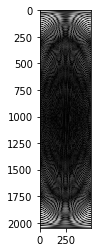

In [59]:
projection = fft(img, axis=0) * fourier_filter
plt.imshow((np.abs(projection)), cmap='gray')

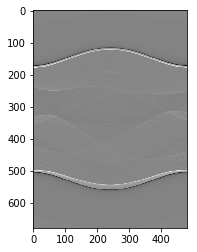

In [61]:
radon_filtered = np.real(ifft(projection, axis=0))
radon_filtered = radon_filtered[:radon_image.shape[0], :]
plt.imshow(radon_filtered, cmap='gray')

In [73]:
reconstructed = np.zeros((480, 480))
mid_index = radon_image.shape[0] // 2
print(mid_index)
[X, Y] = np.mgrid[0:480, 0:480]
xpr = X - int(480) // 2
ypr = Y - int(480) // 2
xpr

339


array([[-240, -240, -240, ..., -240, -240, -240],
       [-239, -239, -239, ..., -239, -239, -239],
       [-238, -238, -238, ..., -238, -238, -238],
       ..., 
       [ 237,  237,  237, ...,  237,  237,  237],
       [ 238,  238,  238, ...,  238,  238,  238],
       [ 239,  239,  239, ...,  239,  239,  239]])

In [90]:
x = np.arange(radon_filtered.shape[0]) - mid_index
x

array([-339, -338, -337, -336, -335, -334, -333, -332, -331, -330, -329,
       -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318,
       -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307,
       -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296,
       -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285,
       -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274,
       -273, -272, -271, -270, -269, -268, -267, -266, -265, -264, -263,
       -262, -261, -260, -259, -258, -257, -256, -255, -254, -253, -252,
       -251, -250, -249, -248, -247, -246, -245, -244, -243, -242, -241,
       -240, -239, -238, -237, -236, -235, -234, -233, -232, -231, -230,
       -229, -228, -227, -226, -225, -224, -223, -222, -221, -220, -219,
       -218, -217, -216, -215, -214, -213, -212, -211, -210, -209, -208,
       -207, -206, -205, -204, -203, -202, -201, -200, -199, -198, -197,
       -196, -195, -194, -193, -192, -191, -190, -1

0


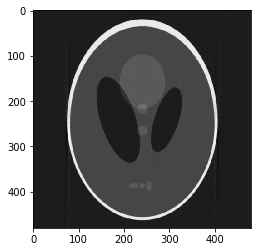

In [92]:
for i in range(len(theta)):
        t = ypr * np.cos(th[i]) - xpr * np.sin(th[i])
        backprojected = np.interp(t, x, radon_filtered[:, i], left=0, right=0)
        reconstructed += backprojected
        if(i/12 == 0):
            print(i)
            plt.imshow(reconstructed, cmap = 'gray')

In [81]:
radius = 480 // 2
reconstruction_circle = (xpr ** 2 + ypr ** 2) <= radius ** 2
reconstructed[~reconstruction_circle] = 0.

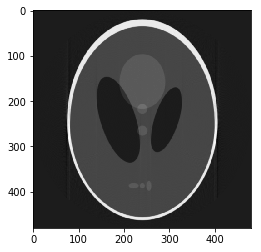

In [82]:
out = reconstructed * np.pi / (2 * len(th))
plt.imshow(out, cmap='gray')

In [109]:
o = np.ones((480,480))
o.reshape(230400,1)

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

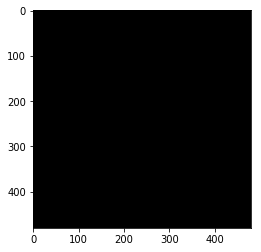

In [21]:
img = np.ones((480,480))
sinogram = np.zeros((480, 480), dtype=np.float64)
steps = 480
for step in range(steps):
    rotation = misc.imrotate(img, -step*180/steps).astype('float64')
    if(step/12 == 0):
        plt.imshow(rotation, cmap='gray')
    sinogram[:,step] = sum(rotation)

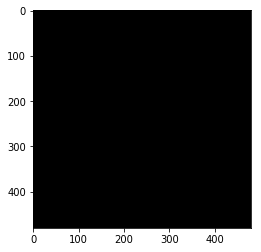

In [22]:
% matplotlib inline
plt.imshow(sinogram, cmap='gray')

In [23]:
sum(sinogram)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0